In [1]:
import pandas as pd
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

### Create search terms and generate query for Scopus

In [5]:
systematic_search_terms= [
    'Belief* Network',
    'Belief* System',
    'Belief* Map',
    'Belief* Set',
    'Issue* Network',
    'Issue* System',
    'Issue* Map',
    'Issue* Set',
    'Opinion* Network',
    'Opinion* System', # keep an eye on this one
    'Opinion* Map',
    'Opinion* Set',
    # 'Value Network', catches valued networks too, physics heavy application
    # 'Values Network',
    'Value System',
    # 'Value* Map', business heavy application
    'Value Set',
    'Attitude* Network',
    'Attitude* System',
    'Attitude* Map',
    'Attitude* Set',
    # 'Cogni* Network', catches engineering and medical applications
    'Cogni* System',
    'Cogni* Map', # cognitive catches a lot of things, FUZZY exclude needed
    'Cogni* Set', 
    'Network of Belief',
    'Network of Issue',
    'Network of Opinion',
    # 'Network of Values', catching SBM stuff
    'Network of Attitudes',
    'Network of Cogni*', # FINISHED HERE 2023.11.20
    'System* of Beliefs',
    'System* of Issue',
    'System* of Opinion',
    'System* of Value',
    'System* of Attitude',
    # 'System* of Cogni*', catches neuroscience and dual process stuff
    'Map* of Belief',
    'Map* of Issue',
    'Map* of Opinion',
    # 'Map of Values',
    'Map* of Attitude',
    # 'Map of Cognitives', neuroscience heavy application
    # 'Set of Beliefs',
    # 'Set of Issues',
    # 'Set of Opinions',
    # 'Set of Values',
    # 'Set of Attitudes',
    # 'Set of Cognitives', lot of noise in all the "set" keywords
    'Relationship Between Belief',
    # 'Relationship Between of Issue' , ?
    'Relationship Between Opinion',
    'Relationship Between Value',
    'Relationship Between Attitude',
    # 'Relationship Between of Cognitives',
    "Mental Map",
]

def generate_query(search_terms):
    # Joining keywords with ' OR ' and enclosing each in quotation marks
    joined_search_terms = ' OR '.join(f'"{term}"' for term in search_terms)
    # Constructing the final query
    query = f'TITLE-ABS-KEY ({joined_search_terms})'
    return query

query = generate_query(systematic_search_terms)
print(query)


TITLE-ABS-KEY ("Belief* Network" OR "Belief* System" OR "Belief* Map" OR "Belief* Set" OR "Issue* Network" OR "Issue* System" OR "Issue* Map" OR "Issue* Set" OR "Opinion* Network" OR "Opinion* System" OR "Opinion* Map" OR "Opinion* Set" OR "Value System" OR "Value Set" OR "Attitude* Network" OR "Attitude* System" OR "Attitude* Map" OR "Attitude* Set" OR "Cogni* System" OR "Cogni* Map" OR "Cogni* Set" OR "Network of Belief" OR "Network of Issue" OR "Network of Opinion" OR "Network of Attitudes" OR "Network of Cogni*" OR "System* of Beliefs" OR "System* of Issue" OR "System* of Opinion" OR "System* of Value" OR "System* of Attitude" OR "Map* of Belief" OR "Map* of Issue" OR "Map* of Opinion" OR "Map* of Attitude" OR "Relationship Between Belief" OR "Relationship Between Opinion" OR "Relationship Between Value" OR "Relationship Between Attitude" OR "Mental Map")


# 1. Download by cagetory on all search terms


In [52]:
# Mapping of file numbers to categories
categories = {
    # 1: "Computer Science Pre 2017",
    1: "Computer Science",
    # 2: "Computer Science Post 2017",
    2: "Computer Science",
    # 3: "Engineering Pre 2017",
    3: "Engineering",
    # 4: "Engineering Post 2017",
    4: "Engineering",
    5: "Social Sciences",
    6: "Mathematics",
    7: "Psychology",
    8: "Arts and Humanities",
    9: "Medicine",
    10: "Neuroscience",
    11: "Business Management and Accounting",
    12: "Environmental Science",
    13: "Decision Sciences",
    14: "Physics and Astronomy",
    15: "Agricultural and Biological Sciences",
    16: "Materials Science",
    17: "Economics Econometrics Finance",
    18: "Biochemistry Genetics and Molecular Biology",
    19: "Earth and Planetary Sciences",
    20: "Energy",
    21: "Health Professions",
    22: "Nursing",
    23: "Multidisciplinary",
    24: "Chemical Engineering",
    25: "Chemistry",
    26: "Pharmacology Toxicology and Pharmaceutics",
    27: "Immunology and Microbiology",
    28: "Veterinary",
    29: "Dentistry",
    30: "Undefined",
}

# Directory containing the files
directory = "data/by category/raw/"  # Replace with the path to your files

# List to hold all dataframes
dataframes = []

# Iterate over the files in the directory
for filename in os.listdir(directory):
    if filename.startswith("scopus") and filename.endswith(".csv"):
        # Extract the number from the filename
        file_number = int(filename.split('(')[1].split(')')[0])+1
        # print(filename, file_number)
        # Read the CSV file into a dataframe
        df = pd.read_csv(os.path.join(directory, filename))
        
        # Add the category column
        df['Domain'] = categories.get(file_number, "Unknown")
        
        # Append the dataframe to the list
        dataframes.append(df)

# Now dataframes is a list of dataframes with the category column added
# concat all dataframes into one
papers = pd.concat(dataframes)

# filter on articles and book chapters
papers = papers[papers['Document Type'].isin(['Article', 'Book chapter'])]

print([papers.columns])


papers.head()


[Index(['Authors', 'Author full names', 'Author(s) ID', 'Title', 'Year',
       'Source title', 'Volume', 'Issue', 'Art. No.', 'Page start', 'Page end',
       'Page count', 'Cited by', 'DOI', 'Link', 'Abstract', 'Author Keywords',
       'Index Keywords', 'References', 'Document Type', 'Publication Stage',
       'Open Access', 'Source', 'EID', 'Domain'],
      dtype='object')]


,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,Abstract,Author Keywords,Index Keywords,References,Document Type,Publication Stage,Open Access,Source,EID,Domain
0,Hernansanz A.; Parra J.; Sayols N.; Eixarch E....,"Hernansanz, Albert (23389102600); Parra, Johan...",23389102600; 55241569400; 57200699438; 8650046...,Robot assisted Fetoscopic Laser Coagulation: I...,2024,Artificial Intelligence in Medicine,147,NaN,102725,NaN,...,Fetoscopic Laser Coagulation (FLC) for Twin to...,Fetoscopic laser coagulation; Robotic minimall...,Exercise; Female; Fetoscopes; Humans; Laser Co...,"Blickstein I., Monochorionicity in perspective...",Article,Final,NaN,Scopus,2-s2.0-85178331130,Medicine
1,Verhoef R.E.J.; van Dijk A.; Thomaes S.; Verhu...,"Verhoef, Rogier E J (57203654220); van Dijk, A...",57203654220; 57193243200; 23013628300; 6504206...,Detecting social information processing profil...,2023,Development and psychopathology,35,4,NaN,1843,...,Children with aggressive behavior problems may...,aggression; children; latent profile analysis;...,Aggression; Child; Cognition; Executive Functi...,NaN,Article,Final,All Open Access; Hybrid Gold Open Access,Scopus,2-s2.0-85177103238,Medicine
2,Wang D.; Xie S.; Wu J.; Sun B.,"Wang, Dingyao (57744592600); Xie, Shitong (572...",57744592600; 57214320802; 57211842205; 5720888...,The trend in quality of life of Chinese popula...,2023,BMC Public Health,23,1,167,NaN,...,Background: Quality of life (QoL) is one of th...,China; EQ-5D; Population health surveys; Quali...,East Asian People; Female; Health Status; Heal...,The World Health Organization quality of life ...,Article,Final,All Open Access; Gold Open Access; Green Open ...,Scopus,2-s2.0-85146736945,Medicine
3,Elkenkamp S.; Ludwig K.; Greiner W.,"Elkenkamp, Svenja (57191894108); Ludwig, Krist...",57191894108; 57193359237; 23060152300,Influence of Self-Reported Health Impairments ...,2023,Value in Health,26,11,NaN,1636,...,Objectives: The German EQ-5D-5L value set is b...,EQ-5D-5L,Chronic Disease; Germany; Health Status; Human...,"Greiner W., 4. Der EQ-5D der EuroQol-Gruppe [H...",Article,Final,NaN,Scopus,2-s2.0-85174844795,Medicine
4,Weygand J.; Armstrong T.; Bryant J.M.; Andreoz...,"Weygand, Joseph (57189846670); Armstrong, Tess...",57189846670; 57193931890; 57212274130; 5616624...,"Accurate, repeatable, and geometrically precis...",2023,Physics and Imaging in Radiation Oncology,28,NaN,100505,NaN,...,Background and purpose: Diffusion weighted ima...,Apparent diffusion coefficient; Cellularity; D...,povidone; apparent diffusion coefficient; Arti...,"Raaymakers B.W., Lagendijk J.J.W., Overweg J.,...",Article,Final,All Open Access; Gold Open Access; Green Open ...,Scopus,2-s2.0-85177795852,Medicine


In [40]:
# number of unique papers 
print("number of unique papers")
print("by title: ", len(papers['Title'].unique()))
print("by DOI: ", len(papers['DOI'].unique()))
print("by EID: ", len(papers['EID'].unique()))

number of unique papers
by title:  25993
by DOI:  24274
by EID:  26069


In [41]:
# Group by a unique identifier (e.g., 'EID') and aggregate categories
unified_papers = papers.groupby(['Title', 'Authors', 'Year']).agg({
    # 'Authors': 'first', 
    # 'Author full names': 'first',
    'Author(s) ID': 'first',
    # 'Title': 'first',
    # 'Year': 'first',
    # 'Source title': 'first',
    # 'Volume': 'first',
    # 'Issue': 'first',
    # 'Art. No.': 'first',
    # 'Page start': 'first',
    # 'Page end': 'first',
    # 'Page count': 'first',
    # 'Cited by': 'first',
    # 'EID': 'first',
    # 'Link': 'first',
    'DOI': 'first',
    'Abstract': 'first',
    'Author Keywords': 'first',
    'Index Keywords': 'first',
    # 'References': 'first',
    # 'Document Type': 'first',
    # 'Publication Stage': 'first',
    # 'Open Access': 'first',
    # 'Source': 'first',
    'Domain': lambda x: list(set(x))
}).reset_index()

unified_papers.to_pickle('data/by category/unified.pkl')


unified_papers

,Title,Authors,Year,Author(s) ID,DOI,Abstract,Author Keywords,Index Keywords,Domain
0,CORR Insights ...,Maltenfort M.,2017,57193449052,10.1007/s11999-017-5353-2,[No abstract available],None,Bayes Theorem; Humans; Osteosarcoma; Sarcoma; ...,[Medicine]
1,Cognitive deficits in...,Shukitt-Hale B.; Casadesus G.; Cantuti-Castelv...,2003,7003496560; 6602555792; 56455611200; 710284224...,10.1016/S0273-1177(02)00878-5,Exposing rats to ...,None,Cognitive systems; Iron; Magnetosphere; Random...,"[Earth and Planetary Sciences, Physics and Ast..."
2,Estimating Regional G...,Shen H.; Li T.; Yuan Q.; Zhang L.,2018,8359721100; 56813980500; 36635300800; 8359720900,10.1029/2018JD028759,Almost all remote...,deep learning; PM2.5; satellite remote sensing...,China; Hubei; aerosol composition; atmospheric...,[Earth and Planetary Sciences]
3,Exploration of the im...,Devi D.D.A.D.; Rani J.F.M.; Vijayalakshmi P.; ...,2019,57208599994; 57208872780; 57210637529; 5721060...,None,"Digitalization, the fashion of this era has tu...",Blended learning; Combined disjoint block; Fuz...,None,[Business Management and Accounting]
4,On components of vect...,Anbar N.; Kaşıkcı C.; Topuzoğlu A.,2019,35147710400; 57188925203; 8971576800,10.1016/j.ffa.2019.03.006,We consider vecto...,Curves over finite fields; Local permutation p...,Finite element method; Absolutely irreducible;...,[Mathematics]
...,...,...,...,...,...,...,...,...,...
25995,“Will There Be a Willingness to Actually Engag...,Osazuwa S.; Moodley R.,2023,57193425519; 11439340300,10.1037/int0000289,The added focus on health equity and multicult...,African indigenous healing traditions and beli...,adult; African; African American; Article; att...,"[Psychology, Medicine]"
25996,"“Wo Sind EUre Werte?"": Remarks on the Practica...",Schink P.,2023,56528414200,10.4324/9781003245278-8,"Against the backdrop of flight, migration and ...",None,None,"[Arts and Humanities, Engineering]"
25997,“Would You Allow Your Wife to Dress in a Minis...,Marín-Morales A.; Bueso-Izquierdo N.; Hidalgo-...,2022,57196236986; 56755401000; 36018521100; 5715605...,10.1177/0886260520926494,Moral convictions consist of assessments based...,batterers; default mode network; dilemmas; fMR...,Criminals; Default Mode Network; Female; Human...,[Psychology]
25998,"“…I have my dad, sister, brother, and mom’s pa...",Dumaru P.; Shrestha A.; Paudel R.; Haverkamp C...,2023,58070694200; 57205659425; 58070694300; 5720174...,10.1108/ICS-04-2023-0047,Purpose: The purpose of this study is to under...,Mental models; Security tools; User study,Privacy-preserving techniques; Data access; De...,"[Computer Science, Business Management and Acc..."


In [ ]:
# unified_papers["Domain"].apply(lambda x: len(x)).value_counts()


In [ ]:
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Sample dataframe structure
# df = unified_papers

# # Step 1: Extract Domains
# all_domains = set()
# for domains in df['Domain']:
#     all_domains.update(domains)
# all_domains = sorted(all_domains)

# # Step 2: Build Intersection Matrix
# intersection_matrix = pd.DataFrame(0, index=all_domains, columns=all_domains)

# for domains in df['Domain']:
#     for i in range(len(domains)):
#         for j in range(i+1, len(domains)):
#             intersection_matrix.at[domains[i], domains[j]] += 1
#             intersection_matrix.at[domains[j], domains[i]] += 1

# # Step 3: Create Heatmap
# plt.figure(figsize=(25, 10))
# sns.heatmap(intersection_matrix, annot=True, cmap='viridis')
# plt.title('Heatmap of Domain Intersections')
# plt.show()


# 2. Manual audit filtering 

### TODO:
- ~~update based on audit from Claudia~~
- sort out duplicate titles manually
- add topic/method labels to papers


### 2.1 Creating eligible domain-search term pairs

In [54]:
unified_papers = pd.read_pickle('data/by category/unified.pkl')

In [55]:
def scopus_query_to_regex(query):
    words = query.split()
    regex_parts = [word.replace('*', '\\S*') for word in words]
    regex_pattern = '\\s+'.join(regex_parts)
    return re.compile(regex_pattern, re.IGNORECASE)


In [56]:
# Compile regex patterns with their corresponding keywords
compiled_patterns = [(keyword, scopus_query_to_regex(keyword)) for keyword in systematic_search_terms]

def find_matching_terms(text):
    # Find all keywords that match the text
    matched_search_terms = [term for term, pattern in compiled_patterns if pattern.search(text)]
    return matched_search_terms

# Apply the function across the DataFrame
unified_papers['Matched Search Terms'] = unified_papers.apply(
    lambda row: find_matching_terms(row['Title'] + ' ' + row['Abstract'] + ' ' + str(row['Author Keywords']) + ' ' + str(row['Index Keywords'])),
    axis=1
)

filtered_papers = unified_papers[unified_papers['Matched Search Terms'].apply(lambda x: len(x) != 0)]

In [57]:
# Step 1: Flatten the DataFrame
rows = []
for _, row in unified_papers.iterrows():
    for term in row['Matched Search Terms']:
        for domain in row['Domain']:
            rows.append({'Search Term': term, 'Domain': domain})

flattened_df = pd.DataFrame(rows)

# # Step 2: Create a Pivot Table
# pivot_table = pd.pivot_table(flattened_df, index='Search Term', columns='Domain', aggfunc=len, fill_value=0)

# # Step 3: Generate the Heatmap
# plt.figure(figsize=(15, 8))
# sns.heatmap(pivot_table, 
#             # annot=True,
#             cmap='YlGnBu')
# plt.title('Heatmap of Term-Domain Occurrences')
# plt.ylabel('Search Term')
# plt.xlabel('Domain')
# plt.show()



pair_df = flattened_df.groupby(['Domain','Search Term']).size().reset_index().rename(columns={0:'document_count'}).sort_values('document_count', ascending=False)

# Cutoff of 50 documents
pair_df = pair_df[pair_df['document_count'] > 50]
pair_df["Include"] = 0

# split dataframe into two and save parts into two csv files
pair_df.iloc[:len(pair_df)//2].to_csv('data/domain_search_term_pairs_1.csv', index=False) # for Arturo
pair_df.iloc[len(pair_df)//2:].to_csv('data/domain_search_term_pairs_2.csv', index=False) # for Laura

pair_df


,Domain,Search Term,document_count,Include
158,Computer Science,Cogni* System,1858,0
477,Neuroscience,Cogni* System,1380,0
286,Engineering,Cogni* System,1361,0
566,Psychology,Cogni* System,1238,0
153,Computer Science,Belief* Network,976,0
...,...,...,...,...
422,Medicine,Cogni* Set,52,0
33,Arts and Humanities,Belief* Set,52,0
155,Computer Science,Belief* System,52,0
299,Engineering,Relationship Between Belief,52,0


### 2.2 Filtering based on results of manual audit

In [58]:
# arturo_review = pd.read_excel('data/manual_audit_arturo_1.xlsx')
# laura_review = pd.read_excel('data/domain_search_term_pairs_2.xlsx')

combined_review = pd.read_excel('data/BeliefNetworks_audit_combined.xlsx')

# Creating the dictionary directly without an intermediate step for included_terms

result_dict_direct = {}
for index, row in combined_review.iterrows():
    if row['Include'] == 1:
        key = (row['Domain'], row['Search Term'])
        if row['method'] == 1 and row['topic'] == 0:
            value = 'method'
        elif row['method'] == 0 and row['topic'] == 1:
            value = 'topic'
        elif row['method'] == 1 and row['topic'] == 1:
            value = 'both'
        else:
            continue  # Skip if none of the conditions are met
        result_dict_direct[key] = value

# Now, included_terms can just be the keys of result_dict_direct
included_terms = list(result_dict_direct.keys())

# included_terms = combined_review.loc[combined_review['Include'] == 1, ['Domain', 'Search Term']].apply(tuple, axis=1).tolist()

unified_papers['Criteria'] = unified_papers.apply(lambda row: [(domain, search_term) for domain in row['Domain'] for search_term in row['Matched Search Terms']], axis=1)

filtered_unified_papers = unified_papers[unified_papers['Criteria'].apply(lambda criteria: any(criterion in included_terms for criterion in criteria))].reset_index(drop=True)
print(filtered_unified_papers.shape)


def clean_text(text, lower=True):
    if lower == True:
        # Convert text to lowercas
        text = text.lower() 
    
    # Replace non-alphanumeric characters with a space
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    return text


# Clean the 'Title' and 'Authors' columns
filtered_unified_papers['Title'] = filtered_unified_papers['Title'].apply(clean_text)
filtered_unified_papers['Authors'] = filtered_unified_papers['Authors'].apply(clean_text, args=(False,))


(6654, 11)


In [59]:
# auditing duplicate titles
filtered_unified_papers[filtered_unified_papers.duplicated(subset=['Title'], keep=False)].sort_values('Title')

,Title,Authors,Year,Author(s) ID,DOI,Abstract,Author Keywords,Index Keywords,Domain,Matched Search Terms,Criteria
367,a hybrid inconsistent sustainable chemical ind...,Han Y Lu Z Chen S,2017,55489221300; 38862422400; 55733365300,10.3934/JIMO.2018093,Depletion of energy and environment pollution ...,Bipolar linguistic fuzzy set; Chemical industr...,None,"[Business Management and Accounting, Mathematics]",[Cogni* Map],"[(Business Management and Accounting, Cogni* M..."
368,a hybrid inconsistent sustainable chemical ind...,Han Y Lu Z Chen S,2019,55489221300; 38862422400; 55733365300,10.3934/jimo.2018093,Depletion of energy and environment pollution ...,Bipolar linguistic fuzzy set; Chemical industr...,None,"[Business Management and Accounting, Mathematics]",[Cogni* Map],"[(Business Management and Accounting, Cogni* M..."
1003,analysis of side effects of chemotheraphy trea...,Dutta A K,2016,57077736900,None,Cancer is considered as a most dangerous disea...,None,None,[Engineering],[Cogni* Map],"[(Engineering, Cogni* Map)]"
1004,analysis of side effects of chemotheraphy trea...,Dutta A K,2015,57077736900,None,Cancer is considered as a most dangerous disea...,Chemotherapy; Cognitive maps; Fuzzy sets; Intu...,None,[Engineering],[Cogni* Map],"[(Engineering, Cogni* Map)]"
1618,cognitive maps in entrepreneurship researchin...,Br nnback M Carsrud A,2009,6507480247; 6603246115,10.1007/978-1-4419-0443-0_5,"In this chapter, we show that cognitive maps a...",Corporate Entrepreneurship; Critical Success F...,None,[Business Management and Accounting],[Cogni* Map],"[(Business Management and Accounting, Cogni* M..."
1619,cognitive maps in entrepreneurship researchin...,Br nnback M Carsrud A,2017,6507480247; 6603246115,10.1007/978-3-319-45544-0_9,"In this chapter, we show that cognitive maps a...",Corporate Entrepreneurship; Critical Success F...,None,[Business Management and Accounting],[Cogni* Map],"[(Business Management and Accounting, Cogni* M..."
1779,conclusion,Kaufer R,2023,57459476400,10.1007/978-3-031-18965-4_9,"Deforestation, environmental degradation, and ...",None,None,[Engineering],[Belief* System],"[(Engineering, Belief* System)]"
1780,conclusion,Mielusel R Reeck L,2022,57203448138; 55288840000,10.1007/978-3-030-81234-8_13,The conclusion examines the importance of self...,Artistic (self)-representations; Dissensus; Is...,None,"[Arts and Humanities, Engineering]",[Belief* System],"[(Arts and Humanities, Belief* System), (Engin..."
1781,conclusion,Ross C P,2013,57211903254,10.4324/9780203766323-41,My first observation is hardly original but gl...,None,None,[Psychology],[Belief* System],"[(Psychology, Belief* System)]"
1941,culturally connected integrated stem instruction,Powell T S,2020,57469186300,10.4018/978-1-7998-3652-0.ch007,This chapter provides an overview of integrati...,None,None,[Engineering],[Belief* System],"[(Engineering, Belief* System)]"


In [60]:
# manual correction of duplicates
# list of indices to drop
drop_list = [368, 1003, 1619, 1779, 1780, 1781, 1942, 2195, 3477, 3475, 3547, 3597, 3598, 4216, 4452, 4453, 4788, 5241]

# drop rows in drop_list
filtered_unified_papers = filtered_unified_papers.drop(drop_list).reset_index(drop=True)

filtered_unified_papers

,Title,Authors,Year,Author(s) ID,DOI,Abstract,Author Keywords,Index Keywords,Domain,Matched Search Terms,Criteria
0,exploration of the im...,Devi D D A D Rani J F M Vijayalakshmi P ...,2019,57208599994; 57208872780; 57210637529; 5721060...,None,"Digitalization, the fashion of this era has tu...",Blended learning; Combined disjoint block; Fuz...,None,[Business Management and Accounting],[Cogni* Map],"[(Business Management and Accounting, Cogni* M..."
1,a botanical beehive of poetry and belief in ...,Mote M,2023,56548663400,10.1080/14601176.2023.2255499,Botanical Beehive describes and interprets an ...,Botany; nature printing; pietism; poetry,None,"[Environmental Science, Arts and Humanities]",[Relationship Between Belief],"[(Environmental Science, Relationship Between ..."
2,colonialingualism colonial legacies imperi...,Meighan P J,2023,57210725703,10.1080/15595692.2022.2082406,Translanguaging and plurilingual approaches in...,None,None,[Engineering],[Belief* System],"[(Engineering, Belief* System)]"
3,the man died wole soyinka s imprisonment an...,Osagie I,2022,26035309600,10.1080/14788810.2020.1870400,Nigerian playwright Femi Euba utilizes the Yor...,Esu; Nigerian civil war; Obafemi Awolowo; ritu...,None,"[Arts and Humanities, Engineering]",[Belief* System],"[(Arts and Humanities, Belief* System), (Engin..."
4,christianity and mountainanity the restorat...,Pierce J,2013,57200574103,10.1163/15685292-12341257,The theological underpinnings of John Muir's w...,Alexander Campbell; Christianity; Disciples of...,None,[Arts and Humanities],[Belief* System],"[(Arts and Humanities, Belief* System)]"
...,...,...,...,...,...,...,...,...,...,...,...
6631,trees are our relatives local perceptions o...,Chanza N Musakwa W,2021,57188660492; 55599058500,10.3390/su13115885,The link between nature and society is vital f...,Climate change; Forests; Indigenous knowledge;...,Mashonaland Central; Mbire; Zimbabwe; abatemen...,"[Computer Science, Social Sciences, Energy, En...",[Belief* System],"[(Computer Science, Belief* System), (Social S..."
6632,uncanny creatures of the dark exploring the...,Benavides P Ibarra J T,2021,55674375700; 34768532100,10.5771/0257-9774-2021-1-163,Belief systems of human societies are deeply r...,Chile; Mapuche; Owls; The uncanny; Traditional...,None,"[Arts and Humanities, Engineering]",[Belief* System],"[(Arts and Humanities, Belief* System), (Engin..."
6633,white jihad and white sharia jihadism as ...,Lary M,2023,36925706100,10.1080/09546553.2023.2214240,Militant right-wing extremists frequently vict...,Intra-extremist outbidding; jihadism; right-wi...,None,"[Social Sciences, Engineering]",[Belief* System],"[(Social Sciences, Belief* System), (Engineeri..."
6634,will there be a willingness to actually engag...,Osazuwa S Moodley R,2023,57193425519; 11439340300,10.1037/int0000289,The added focus on health equity and multicult...,African indigenous healing traditions and beli...,adult; African; African American; Article; att...,"[Psychology, Medicine]",[Value System],"[(Psychology, Value System), (Medicine, Value ..."


In [61]:
final_sample = filtered_unified_papers.drop(columns=['Matched Search Terms', 'Domain'])


def extract_domains_terms_and_usecase_with_both(row, included_criteria_dict):
    criteria_list = row['Criteria']  # Assuming this is a list of tuples (Domain, Search Term)
    domains, search_terms, usecases = set(), set(), set()  # Use a set for usecases to avoid duplicates

    for item in criteria_list:
        if item in included_criteria_dict:
            domains.add(item[0])
            search_terms.add(item[1])
            usecases.add(included_criteria_dict[item])  # Add usecase to the set

    # Determine final usecase
    if len(usecases) > 1:
        final_usecase = 'both'
    elif len(usecases) == 1:
        final_usecase = list(usecases)[0]
    else:
        final_usecase = None

    return list(domains), list(search_terms), final_usecase

# Apply the modified function to each row in final_sample
final_sample_results = final_sample.apply(lambda row: extract_domains_terms_and_usecase_with_both(row, result_dict_direct), axis=1)

# Assign the results back to final_sample in new columns
final_sample['Domain'], final_sample['Search Term'], final_sample['Usecase'] = zip(*final_sample_results)

# Assuming you no longer need the Criteria column, drop it and reset the index
final_sample = final_sample.drop(columns=['Criteria']).reset_index(drop=True)

final_sample.to_feather('data/final_sample.feather')

final_sample


,Title,Authors,Year,Author(s) ID,DOI,Abstract,Author Keywords,Index Keywords,Domain,Search Term,Usecase
0,exploration of the im...,Devi D D A D Rani J F M Vijayalakshmi P ...,2019,57208599994; 57208872780; 57210637529; 5721060...,None,"Digitalization, the fashion of this era has tu...",Blended learning; Combined disjoint block; Fuz...,None,[Business Management and Accounting],[Cogni* Map],method
1,a botanical beehive of poetry and belief in ...,Mote M,2023,56548663400,10.1080/14601176.2023.2255499,Botanical Beehive describes and interprets an ...,Botany; nature printing; pietism; poetry,None,[Arts and Humanities],[Relationship Between Belief],topic
2,colonialingualism colonial legacies imperi...,Meighan P J,2023,57210725703,10.1080/15595692.2022.2082406,Translanguaging and plurilingual approaches in...,None,None,[Engineering],[Belief* System],method
3,the man died wole soyinka s imprisonment an...,Osagie I,2022,26035309600,10.1080/14788810.2020.1870400,Nigerian playwright Femi Euba utilizes the Yor...,Esu; Nigerian civil war; Obafemi Awolowo; ritu...,None,"[Engineering, Arts and Humanities]",[Belief* System],both
4,christianity and mountainanity the restorat...,Pierce J,2013,57200574103,10.1163/15685292-12341257,The theological underpinnings of John Muir's w...,Alexander Campbell; Christianity; Disciples of...,None,[Arts and Humanities],[Belief* System],topic
...,...,...,...,...,...,...,...,...,...,...,...
6631,trees are our relatives local perceptions o...,Chanza N Musakwa W,2021,57188660492; 55599058500,10.3390/su13115885,The link between nature and society is vital f...,Climate change; Forests; Indigenous knowledge;...,Mashonaland Central; Mbire; Zimbabwe; abatemen...,"[Engineering, Social Sciences]",[Belief* System],both
6632,uncanny creatures of the dark exploring the...,Benavides P Ibarra J T,2021,55674375700; 34768532100,10.5771/0257-9774-2021-1-163,Belief systems of human societies are deeply r...,Chile; Mapuche; Owls; The uncanny; Traditional...,None,"[Engineering, Arts and Humanities]",[Belief* System],both
6633,white jihad and white sharia jihadism as ...,Lary M,2023,36925706100,10.1080/09546553.2023.2214240,Militant right-wing extremists frequently vict...,Intra-extremist outbidding; jihadism; right-wi...,None,"[Engineering, Social Sciences]",[Belief* System],both
6634,will there be a willingness to actually engag...,Osazuwa S Moodley R,2023,57193425519; 11439340300,10.1037/int0000289,The added focus on health equity and multicult...,African indigenous healing traditions and beli...,adult; African; African American; Article; att...,[Psychology],[Value System],topic


# Plotting -- will need restrictions

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

filtered_unified_papers = pd.read_pickle('data/final_sample.pkl')


### Figure 1

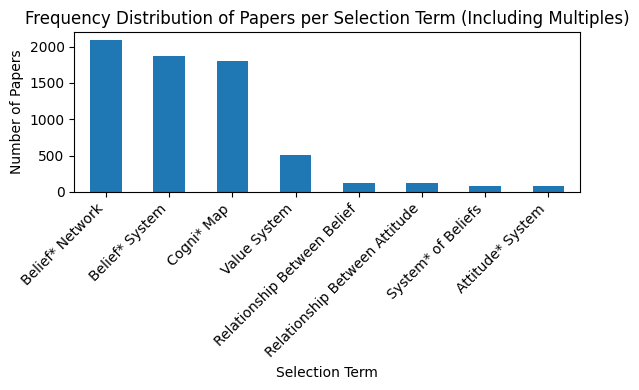

In [18]:

flattened_terms = [term for sublist in filtered_unified_papers['Search Term'] for term in sublist]
terms_counts = pd.Series(flattened_terms).value_counts()

# Plotting
plt.figure(figsize=(6, 4))
terms_counts.plot(kind='bar')
plt.title('Frequency Distribution of Papers per Selection Term (Including Multiples)')
plt.xlabel('Selection Term')
plt.ylabel('Number of Papers')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Show plot
plt.show()

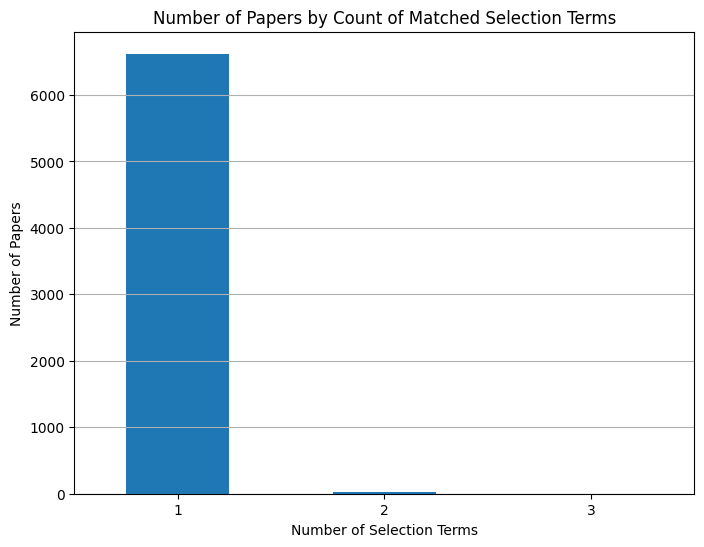

In [19]:
# Calculate the number of selection terms per paper and how many papers correspond to each count

# Count the number of selection terms for each paper
num_terms_per_paper = filtered_unified_papers['Search Term'].apply(len)

# Count how many papers have each number of terms
papers_per_num_terms = num_terms_per_paper.value_counts().sort_index()

# Plotting
plt.figure(figsize=(8, 6))
papers_per_num_terms.plot(kind='bar')
plt.title('Number of Papers by Count of Matched Selection Terms')
plt.xlabel('Number of Selection Terms')
plt.ylabel('Number of Papers')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Show plot
plt.show()


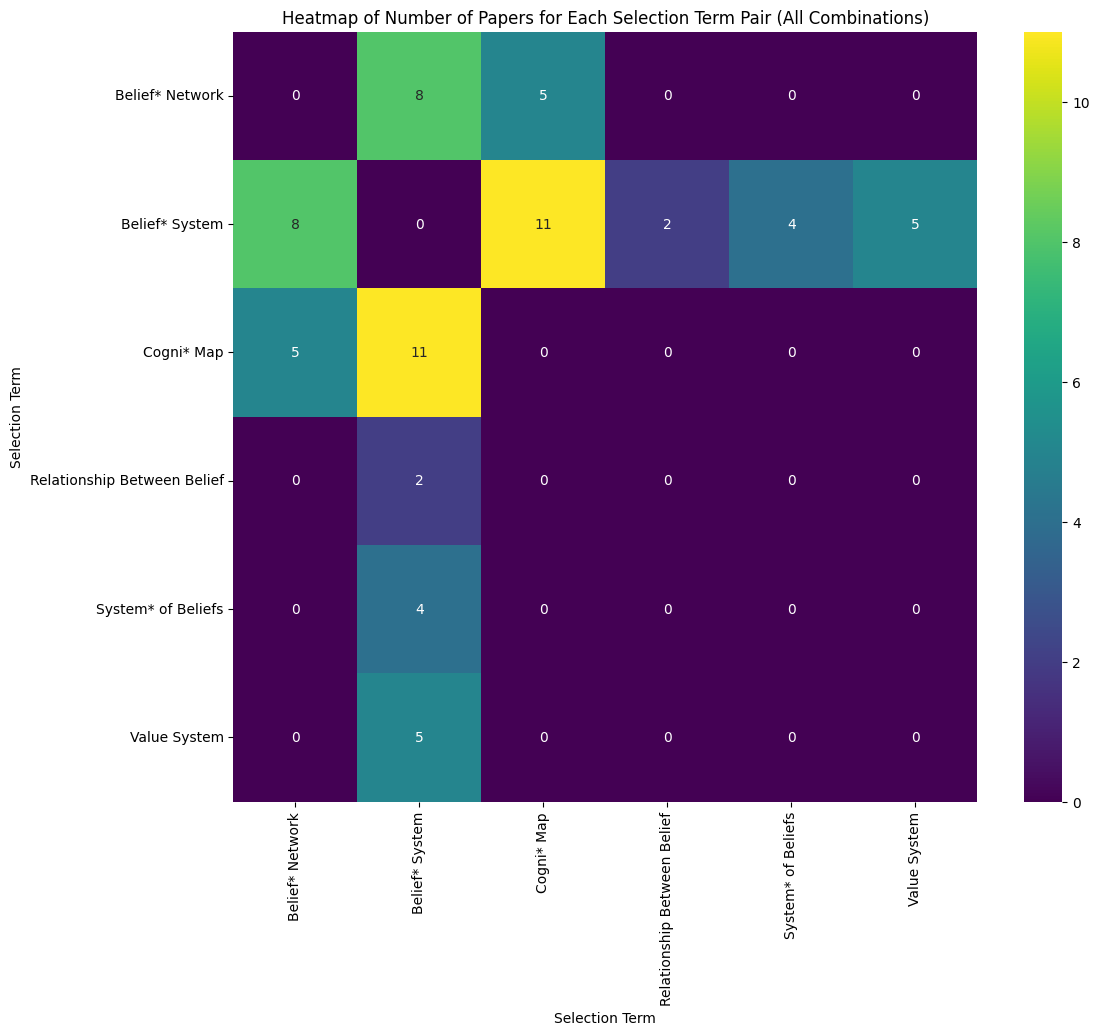

In [20]:

# Filter papers with more than one search term

papers_with_multiple_terms = filtered_unified_papers[filtered_unified_papers['Search Term'].apply(len) > 1]

# Initialize an empty dictionary to count occurrences of each term pair
term_pair_counts = {}

# Generate all unique combinations of term pairs for each paper and count occurrences
for terms in papers_with_multiple_terms['Search Term']:
    for pair in combinations(sorted(set(terms)), 2):
        if pair in term_pair_counts:
            term_pair_counts[pair] += 1
        else:
            term_pair_counts[pair] = 1

# Create a list of all unique terms
unique_terms = sorted(set([term for sublist in papers_with_multiple_terms['Search Term'] for term in sublist]))

# Create a square DataFrame to represent the heatmap matrix
heatmap_matrix = pd.DataFrame(np.zeros((len(unique_terms), len(unique_terms))), index=unique_terms, columns=unique_terms)

# Populate the matrix with the counts
for pair, count in term_pair_counts.items():
    heatmap_matrix.at[pair[0], pair[1]] = count
    heatmap_matrix.at[pair[1], pair[0]] = count  # Ensure the matrix is symmetric

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_matrix, annot=True, cmap='viridis', fmt="g")
plt.title('Heatmap of Number of Papers for Each Selection Term Pair (All Combinations)')
plt.xlabel('Selection Term')
plt.ylabel('Selection Term')
plt.show()


### Figure 2

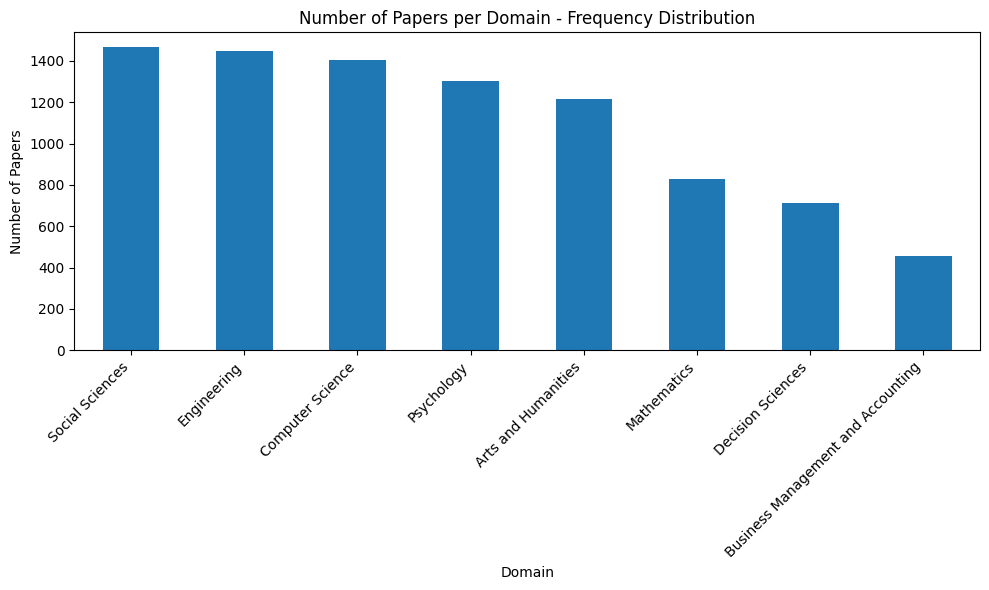

In [21]:
# Unpacking the 'Domain' column which contains lists into separate rows
domains_expanded = filtered_unified_papers.explode('Domain')

# Counting the frequency of each domain
domain_counts = domains_expanded['Domain'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
domain_counts.plot(kind='bar')
plt.title('Number of Papers per Domain - Frequency Distribution')
plt.xlabel('Domain')
plt.ylabel('Number of Papers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

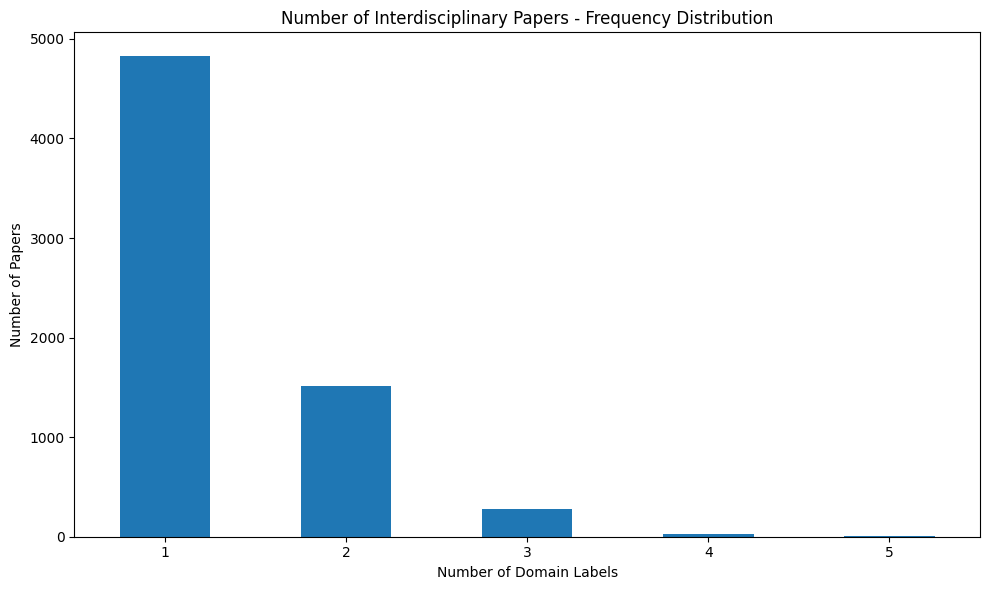

In [22]:
# Counting the number of domains per paper
filtered_unified_papers['Domain_Count'] = filtered_unified_papers['Domain'].apply(len)

# Counting the frequency of each number of domain labels
domain_count_frequency = filtered_unified_papers['Domain_Count'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
domain_count_frequency.plot(kind='bar')
plt.title('Number of Interdisciplinary Papers - Frequency Distribution')
plt.xlabel('Number of Domain Labels')
plt.ylabel('Number of Papers')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

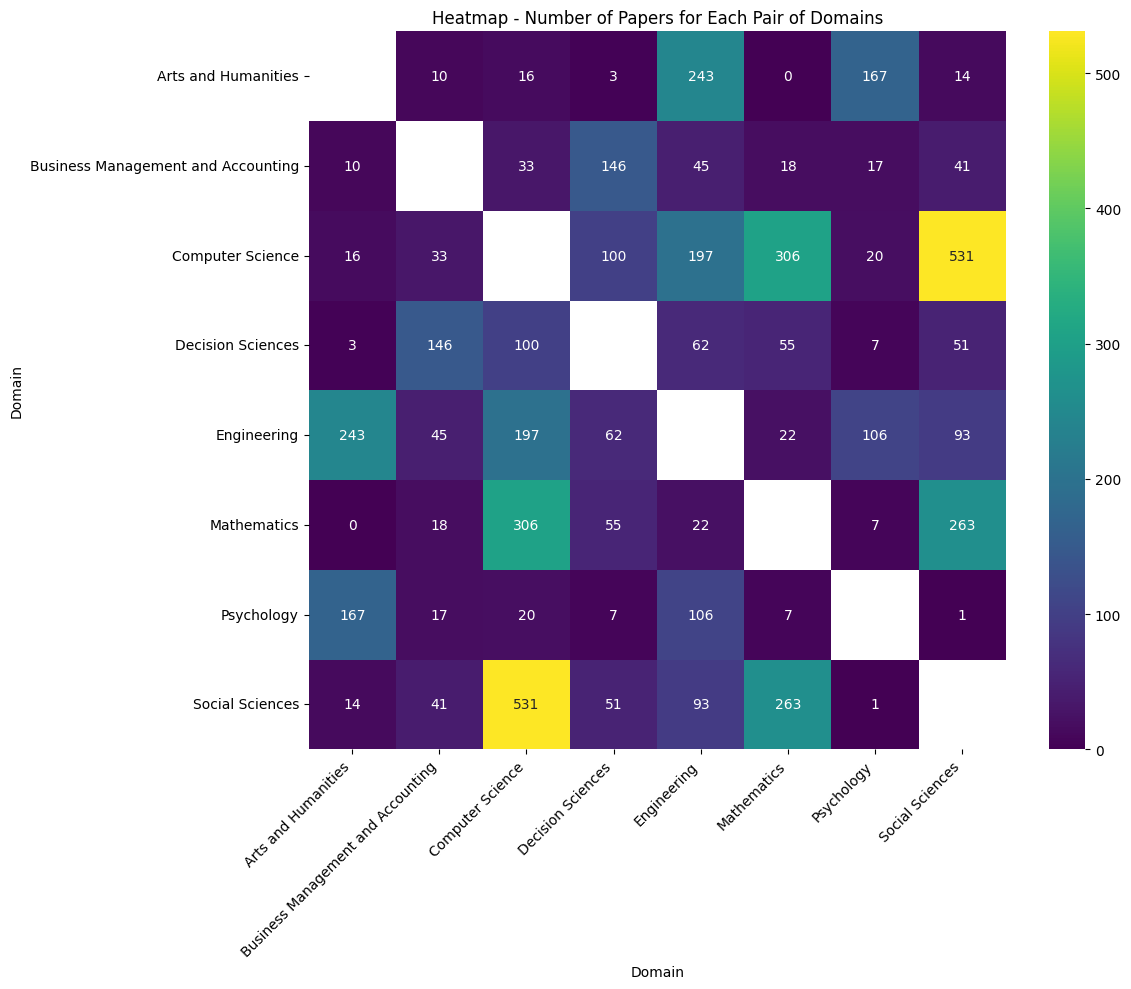

In [28]:
# First, we get a list of all unique domains
all_domains = sorted(set(domains_expanded['Domain']))

# Creating an empty matrix to hold counts for each pair of domains
domain_matrix = pd.DataFrame(np.zeros((len(all_domains), len(all_domains))), index=all_domains, columns=all_domains)

# Filling the matrix with counts for each pair of domains
for _, row in filtered_unified_papers.iterrows():
    domains = row['Domain']
    for i in domains:
        for j in domains:
            domain_matrix.at[i, j] += 1

# set domain matrix diagonal to zero
np.fill_diagonal(domain_matrix.values, np.nan)

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(domain_matrix, annot=True, cmap='viridis', fmt='g')
plt.title('Heatmap - Number of Papers for Each Pair of Domains')
plt.xlabel('Domain')
plt.ylabel('Domain')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Co-authorship network

In [62]:
from tqdm import tqdm

papers_df = pd.read_feather('data/final_sample.feather')

# def clean_text(text, lower=True):
#     if lower == True:
#         # Convert text to lowercas
#         text = text.lower() 
    
#     # Replace non-alphanumeric characters with a space
#     text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
#     return text


# # Clean the 'Title' and 'Authors' columns
# papers_df['Title'] = papers_df['Title'].apply(clean_text)
# papers_df['Authors'] = papers_df['Authors'].apply(clean_text, args=(False,))

# papers_df['name'] = papers_df['Title'] + ' - ' + papers_df['Authors'] + ' (' + papers_df['Year'].astype(str) + ')'

papers_df['Author(s) ID List'] = papers_df['Author(s) ID'].apply(lambda x: x.split('; '))

# Initialize an empty list to store edges
edges = []

# Generate edges
for i in tqdm(range(len(papers_df))):
    for j in range(i + 1, len(papers_df)):
        # Check for shared authors
        if set(papers_df.at[i, 'Author(s) ID List']).intersection(papers_df.at[j, 'Author(s) ID List']):
            edges.append((papers_df.at[i, 'Title'], papers_df.at[j, 'Title']))

# Create an edge DataFrame
edges_df = pd.DataFrame(edges, columns=['Source', 'Target'])

papers_df  =  papers_df[['Title', 'Authors', 'Year', 'DOI', 'Domain', 'Search Term', 'Usecase']]

papers_df.to_feather('data/network/node_list.feather')
edges_df.to_feather('data/network/edge_list.feather')

100%|██████████| 6636/6636 [01:23<00:00, 79.38it/s] 


In [63]:
# check duplicate titles in papers_df
papers_df[papers_df.duplicated(subset=['Title'], keep=False)].sort_values('Title')

,Title,Authors,Year,DOI,Domain,Search Term,Usecase


In [51]:
import igraph as ig
import matplotlib.pyplot as plt
import pandas as pd

papers_df = pd.read_feather('data/network/node_list.feather')
edges_df = pd.read_feather('data/network/edge_list.feather')

g = ig.Graph.TupleList(edges_df.itertuples(index=False), directed=False, weights=False)
g.add_vertices(papers_df['Title'].tolist())



# Iterate through the DataFrame rows and add attributes
for _, row in papers_df.iterrows():
    node_id = row['Title']
    # Assuming 'node_id' is unique and matches the names in the graph
    vertex = g.vs.find(name=node_id)
    for attr in papers_df.columns[1:]:  # Skip the 'node_id' column
        vertex[attr] = row[attr]